In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipdb
import scipy

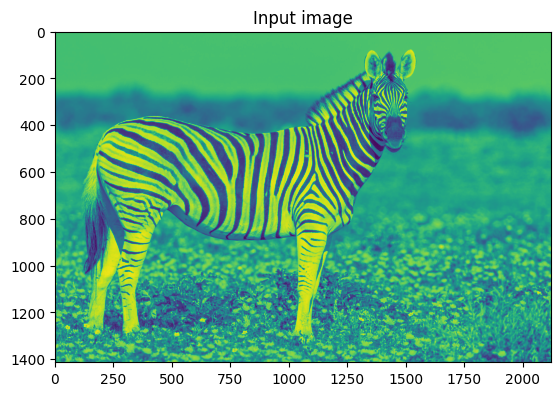

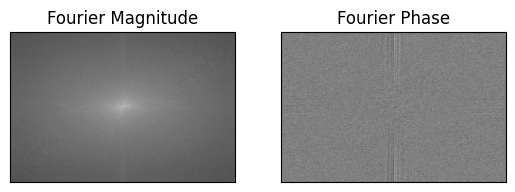

In [8]:
########## Section 1 = Read image and find its Fourier transform #######################
# Load an image
img = cv2.imread('Zebra.jpg', 0)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('Input image')
plt.imshow(img)
plt.show()

# Compute the Fourier Transform of the image
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Compute the magnitude spectrum of the Fourier Transform
magnitude_spectrum = 20*np.log(np.abs(fshift))
#Compute the phase of the Fourier Transform
phase = np.angle(fshift)

# Plot magnitude and phase
plt.subplot(121), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Magnitude'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(phase, cmap='gray')
plt.title('Fourier Phase'),plt.xticks([]), plt.yticks([])
plt.show()

##############################################

C:\Users\Blaze\AppData\Local\Temp\ipykernel_10832\187350661.py:37: RuntimeWarning: divide by zero encountered in log
  b_magnitude_spectrum_filtered_lp = 20 * np.log(np.abs(b_fshift_filtered_lp))
C:\Users\Blaze\AppData\Local\Temp\ipykernel_10832\187350661.py:38: RuntimeWarning: divide by zero encountered in log
  g_magnitude_spectrum_filtered_lp = 20 * np.log(np.abs(g_fshift_filtered_lp))
C:\Users\Blaze\AppData\Local\Temp\ipykernel_10832\187350661.py:39: RuntimeWarning: divide by zero encountered in log
  r_magnitude_spectrum_filtered_lp = 20 * np.log(np.abs(r_fshift_filtered_lp))


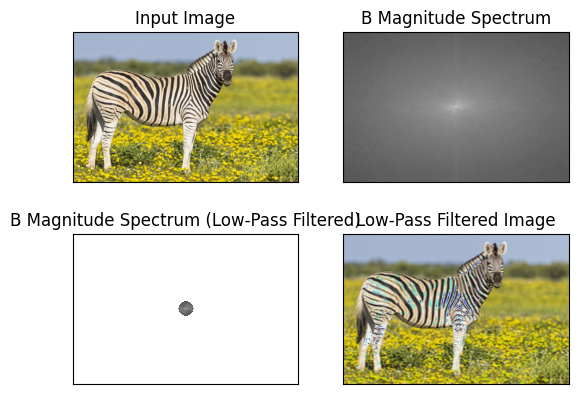

C:\Users\Blaze\AppData\Local\Temp\ipykernel_10832\187350661.py:78: RuntimeWarning: divide by zero encountered in log
  b_magnitude_spectrum_filtered_hp = 20 * np.log(np.abs(b_fshift_filtered_hp))
C:\Users\Blaze\AppData\Local\Temp\ipykernel_10832\187350661.py:79: RuntimeWarning: divide by zero encountered in log
  g_magnitude_spectrum_filtered_hp = 20 * np.log(np.abs(g_fshift_filtered_hp))
C:\Users\Blaze\AppData\Local\Temp\ipykernel_10832\187350661.py:80: RuntimeWarning: divide by zero encountered in log
  r_magnitude_spectrum_filtered_hp = 20 * np.log(np.abs(r_fshift_filtered_hp))


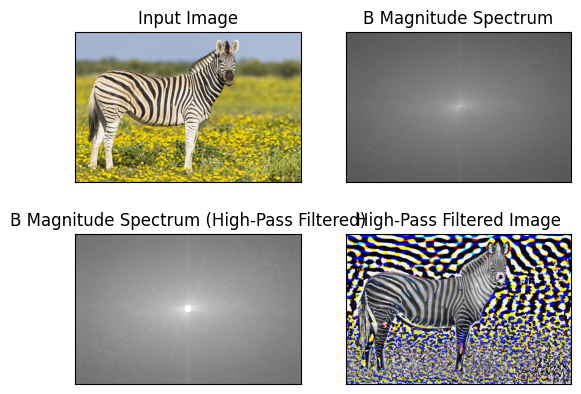

C:\Users\Blaze\AppData\Local\Temp\ipykernel_10832\187350661.py:119: RuntimeWarning: divide by zero encountered in log
  b_magnitude_spectrum_filtered_bp = 20 * np.log(np.abs(b_fshift_filtered_bp))
C:\Users\Blaze\AppData\Local\Temp\ipykernel_10832\187350661.py:120: RuntimeWarning: divide by zero encountered in log
  g_magnitude_spectrum_filtered_bp = 20 * np.log(np.abs(g_fshift_filtered_bp))
C:\Users\Blaze\AppData\Local\Temp\ipykernel_10832\187350661.py:121: RuntimeWarning: divide by zero encountered in log
  r_magnitude_spectrum_filtered_bp = 20 * np.log(np.abs(r_fshift_filtered_bp))


(Text(0.5, 1.0, 'Band-Pass Filtered Image'), ([], []), ([], []))

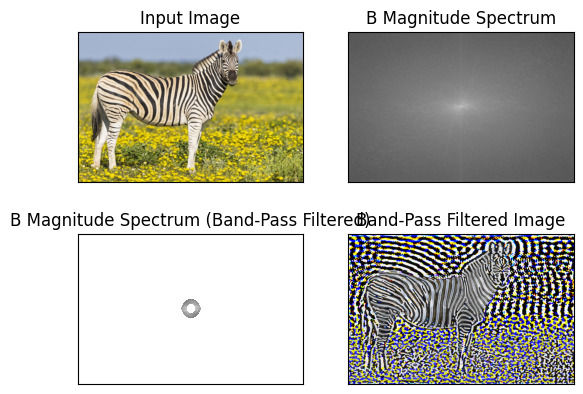

In [9]:
########## Section 2 = Implement both a low-pass, high-pass filter, and a diagonal bandpass filter (of your choice) 
#on the picture in the frequency domain #######################
img = cv2.imread('Zebra.jpg')
# Separate color channels
b, g, r = cv2.split(img)

# Apply Fourier Transform to each channel
b_f = np.fft.fft2(b)
g_f = np.fft.fft2(g)
r_f = np.fft.fft2(r)

# Shift the zero frequency components to the center
b_fshift = np.fft.fftshift(b_f)
g_fshift = np.fft.fftshift(g_f)
r_fshift = np.fft.fftshift(r_f)

# Compute magnitude spectrum for each channel
b_magnitude_spectrum = 20 * np.log(np.abs(b_fshift))
g_magnitude_spectrum = 20 * np.log(np.abs(g_fshift))
r_magnitude_spectrum = 20 * np.log(np.abs(r_fshift))

#Low pass filter

# Define and apply filters to each channel (e.g., low-pass)
rows, cols = img.shape[:2]
crow, ccol = rows // 2, cols // 2
mask_lp = np.zeros((rows, cols), np.uint8)
r = 80
cv2.circle(mask_lp, (ccol, crow), r, 1, -1)

# Apply the filter to each channel
b_fshift_filtered_lp = b_fshift * mask_lp
g_fshift_filtered_lp = g_fshift * mask_lp
r_fshift_filtered_lp = r_fshift * mask_lp

# Compute magnitude spectrum of the filtered Fourier Transform for each channel
b_magnitude_spectrum_filtered_lp = 20 * np.log(np.abs(b_fshift_filtered_lp))
g_magnitude_spectrum_filtered_lp = 20 * np.log(np.abs(g_fshift_filtered_lp))
r_magnitude_spectrum_filtered_lp = 20 * np.log(np.abs(r_fshift_filtered_lp))

# Convert back to spatial domain using Inverse Fourier Transform for each channel
b_img_back_lp = np.fft.ifft2(np.fft.ifftshift(b_fshift_filtered_lp)).real
g_img_back_lp = np.fft.ifft2(np.fft.ifftshift(g_fshift_filtered_lp)).real
r_img_back_lp = np.fft.ifft2(np.fft.ifftshift(r_fshift_filtered_lp)).real

# Combine the filtered channels back into a color image
filtered_img_lp = cv2.merge((b_img_back_lp, g_img_back_lp, r_img_back_lp)).astype(np.uint8)

# Plotting results
plt.subplot(221), plt.imshow(img[:, :, ::-1])  # Show color image
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(b_magnitude_spectrum, cmap='gray')
plt.title('B Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(b_magnitude_spectrum_filtered_lp, cmap='gray')
plt.title('B Magnitude Spectrum (Low-Pass Filtered)'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(filtered_img_lp[:, :, ::-1])
plt.title('Low-Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()


#High pass filter

# Define a high-pass filter
mask_hp = np.ones((rows, cols), np.uint8)
r = 20
cv2.circle(mask_hp, (ccol, crow), r, 0, -1)

# Apply the high-pass filter to the magnitude spectrum
fshift_filtered_hp = fshift * mask_hp


# Apply the filter to each channel
b_fshift_filtered_hp = b_fshift * mask_hp
g_fshift_filtered_hp = g_fshift * mask_hp
r_fshift_filtered_hp = r_fshift * mask_hp

# Compute magnitude spectrum of the filtered Fourier Transform for each channel
b_magnitude_spectrum_filtered_hp = 20 * np.log(np.abs(b_fshift_filtered_hp))
g_magnitude_spectrum_filtered_hp = 20 * np.log(np.abs(g_fshift_filtered_hp))
r_magnitude_spectrum_filtered_hp = 20 * np.log(np.abs(r_fshift_filtered_hp))

# Convert back to spatial domain using Inverse Fourier Transform for each channel
b_img_back_hp = np.fft.ifft2(np.fft.ifftshift(b_fshift_filtered_hp)).real
g_img_back_hp = np.fft.ifft2(np.fft.ifftshift(g_fshift_filtered_hp)).real
r_img_back_hp = np.fft.ifft2(np.fft.ifftshift(r_fshift_filtered_hp)).real

# Combine the filtered channels back into a color image
filtered_img_hp = cv2.merge((b_img_back_hp, g_img_back_hp, r_img_back_hp)).astype(np.uint8)

# Plotting results
plt.subplot(221), plt.imshow(img[:, :, ::-1])  # Show color image
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(b_magnitude_spectrum, cmap='gray')
plt.title('B Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(b_magnitude_spectrum_filtered_hp, cmap='gray')
plt.title('B Magnitude Spectrum (High-Pass Filtered)'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(filtered_img_hp[:, :, ::-1])
plt.title('High-Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()


#Bandpass filter

# Define a diagonal bandpass filter
mask_bp = np.zeros((rows, cols), np.uint8)
r1 = 30
r2 = 100
for i in range(rows):
    for j in range(cols):
        if r1**2 <= (i-crow)**2 + (j-ccol)**2 <= r2**2:
            mask_bp[i,j] = 1

# Apply the filter to each channel
b_fshift_filtered_bp = b_fshift * mask_bp
g_fshift_filtered_bp = g_fshift * mask_bp
r_fshift_filtered_bp = r_fshift * mask_bp

# Compute magnitude spectrum of the filtered Fourier Transform for each channel
b_magnitude_spectrum_filtered_bp = 20 * np.log(np.abs(b_fshift_filtered_bp))
g_magnitude_spectrum_filtered_bp = 20 * np.log(np.abs(g_fshift_filtered_bp))
r_magnitude_spectrum_filtered_bp = 20 * np.log(np.abs(r_fshift_filtered_bp))

# Convert back to spatial domain using Inverse Fourier Transform for each channel
b_img_back_bp = np.fft.ifft2(np.fft.ifftshift(b_fshift_filtered_bp)).real
g_img_back_bp = np.fft.ifft2(np.fft.ifftshift(g_fshift_filtered_bp)).real
r_img_back_bp = np.fft.ifft2(np.fft.ifftshift(r_fshift_filtered_bp)).real

# Combine the filtered channels back into a color image
filtered_img_bp = cv2.merge((b_img_back_bp, g_img_back_bp, r_img_back_bp)).astype(np.uint8)

# Plotting results
plt.subplot(221), plt.imshow(img[:, :, ::-1])  # Show color image
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(b_magnitude_spectrum, cmap='gray')
plt.title('B Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(b_magnitude_spectrum_filtered_bp, cmap='gray')
plt.title('B Magnitude Spectrum (Band-Pass Filtered)'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(filtered_img_bp[:, :, ::-1])
plt.title('Band-Pass Filtered Image'), plt.xticks([]), plt.yticks([])


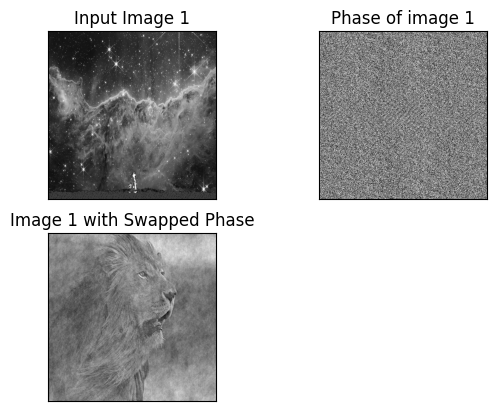

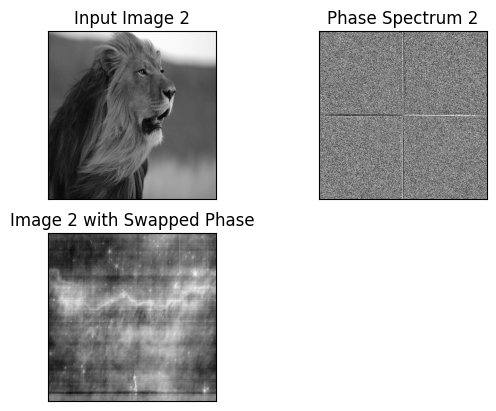

In [10]:
########## Section 4.3 = Phase Swapping #######################

# Load two images
img1 = cv2.imread('Calvin and hobbs.jpeg', 0)
img2 = cv2.imread('lion.png', 0)

img1 = cv2.resize(img1,(512, 512))
img2 = cv2.resize(img2,(512, 512))

# Compute the Fourier Transform of the images
f1 = np.fft.fft2(img1)
fshift1 = np.fft.fftshift(f1)
magnitude_spectrum1 = 20*np.log(np.abs(fshift1))
phase_spectrum1 = np.angle(fshift1)

f2 = np.fft.fft2(img2)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = 20*np.log(np.abs(fshift2))
phase_spectrum2 = np.angle(fshift2)

# Swap the phase responses between both images
fshift1_new = np.abs(fshift1) * np.exp(1j * phase_spectrum2)
fshift2_new = np.abs(fshift2) * np.exp(1j * phase_spectrum1)

# Compute the inverse Fourier Transform of the new frequency responses
img_back1 = np.fft.ifft2(np.fft.ifftshift(fshift1_new)).real
img_back2 = np.fft.ifft2(np.fft.ifftshift(fshift2_new)).real

# Plotting results
plt.subplot(221), plt.imshow(img1, cmap='gray')
plt.title('Input Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(phase_spectrum1, cmap='gray')
plt.title('Phase of image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_back1, cmap='gray')
plt.title('Image 1 with Swapped Phase'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(221), plt.imshow(img2, cmap='gray')
plt.title('Input Image 2'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(phase_spectrum2, cmap='gray')
plt.title('Phase Spectrum 2'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_back2, cmap='gray')
plt.title('Image 2 with Swapped Phase'), plt.xticks([]), plt.yticks([])
plt.show()


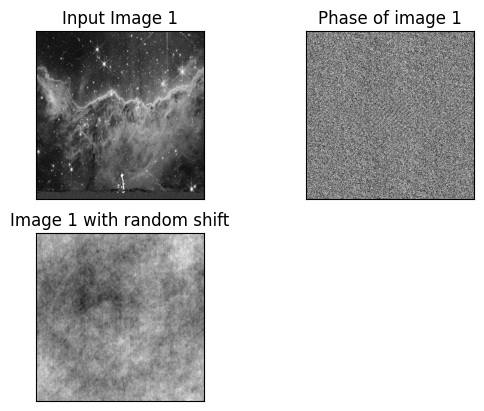

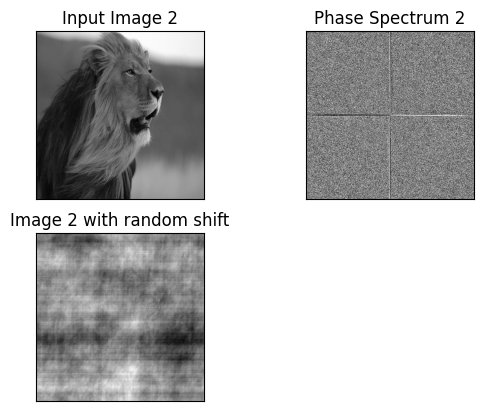

In [11]:
#To modify the phase differently than just swapping them, you can apply a random phase shift

# Apply a random phase shift to one or both of the images
rows, cols = img1.shape
noise = np.random.rand(rows, cols) * 10 - 5 # Random phase shift between -5 and +5 radians
fshift3_new = np.abs(fshift1) * np.exp(1j * (phase_spectrum1 + noise))
noise = np.random.rand(rows, cols) * 10 - 5 # Random phase shift between -5 and +5 radians
fshift4_new = np.abs(fshift2) * np.exp(1j * (phase_spectrum2 + noise))

# Compute the inverse Fourier Transform of the new frequency responses
img_back3 = np.fft.ifft2(np.fft.ifftshift(fshift3_new)).real
img_back4 = np.fft.ifft2(np.fft.ifftshift(fshift4_new)).real

# Plotting results
plt.subplot(221), plt.imshow(img1, cmap='gray')
plt.title('Input Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(phase_spectrum1, cmap='gray')
plt.title('Phase of image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_back3, cmap='gray')
plt.title('Image 1 with random shift'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(221), plt.imshow(img2, cmap='gray')
plt.title('Input Image 2'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(phase_spectrum2, cmap='gray')
plt.title('Phase Spectrum 2'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_back4, cmap='gray')
plt.title('Image 2 with random shift'), plt.xticks([]), plt.yticks([])
plt.show()
